# Visualizing API Data (From the Original Google Folder with Google Colabs)
## The Goal
Now that the API has translated most of the student addresses into the latitude and longitude coordinates, we can plot the points and perform comparisons with our plotted points of the housing violations.

In [ ]:
import folium
from IPython.display import display
import geopandas as gpd

import json
from shapely.geometry import Polygon, Point, shape, mapping
from shapely.ops import transform

from branca.element import Figure
import imageio.v2 as imageio # Use v2 for modern imageio

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator
import matplotlib.image as mpimg

In [ ]:
# Color Palettes for Visualizations
DARK_BLUE = "#332288"
DARK_GREEN = "#117733"
SEA_GREEN = "#44AA99"
MED_BLUE = "#4B9DDC"
SKY_BLUE = "#88CCEE"
YELLOW = "#FFA600"
ORANGE = "#F9A332"
MILD_RED = "#CC6677"
MAGENTA = "#AA4499"
DARK_MAGENTA = "#882255"

GRAY = "#EBEBEB"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Get the file and set to a variable named filename
filename = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/API/Results", "api_results_student_addresses_2020_2021.csv")
filename1 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/API/Results", "api_results_student_addresses_2021_2022.csv")
filename2 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/API/Results", "api_results_student_addresses_2022_2023.csv")
filename3 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/API/Results", "api_results_student_addresses_2023_2024.csv")

# Read the CSV file into a pandas DataFrame
df20_21 = pd.read_csv(filename, header = 0)
df21_22 = pd.read_csv(filename1, header = 0)
df22_23 = pd.read_csv(filename2, header = 0)
df23_24 = pd.read_csv(filename3, header = 0)

In [ ]:
print(df20_21.shape)
print(df21_22.shape)
print(df22_23.shape)
print(df23_24.shape)


(10718, 14)
(9352, 14)
(11058, 14)
(11321, 14)


In [ ]:
df20_21.head(10)

,6a. street #,6b. street name,6c. street suffix,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. at-home or not-at-home,university,year,Street_combined,City,State,latitude_geocoded,longitude_geocoded
0,101,Canal,Street,2114.0,U,FT,N,Bay State College,2020-2021,101 Canal St,Boston,Massachusetts,42.365420,-71.060894
1,175,Blossom,Street,2114.0,U,FT,N,Bay State College,2020-2021,175 Blossom St,Boston,Massachusetts,42.364604,-71.069264
2,45,Stuart,Street,2115.0,U,FT,N,Bay State College,2020-2021,45 Stuart St,Boston,Massachusetts,42.351383,-71.064133
3,797,Huntington,Avenue,2115.0,U,PT,N,Bay State College,2020-2021,797 Huntington Ave,Boston,Massachusetts,42.333354,-71.106856
4,3,Shabazz,Way,2119.0,U,PT,N,Bay State College,2020-2021,3 Shabazz Way,Boston,Massachusetts,42.330062,-71.081204
5,39,Bartlett,Street,2119.0,U,FT,N,Bay State College,2020-2021,39 Bartlett St,Boston,Massachusetts,42.328567,-71.088780
6,62,Forest,Street,2119.0,U,PT,N,Bay State College,2020-2021,62 Forest St,Boston,Massachusetts,42.326011,-71.076484
7,306,Dudley,Street,2119.0,U,PT,N,Bay State College,2020-2021,306 Dudley St,Boston,Massachusetts,42.327955,-71.077484
8,1,Mcgreevey,Way,2120.0,U,FT,N,Bay State College,2020-2021,1 Mcgreevey Way,Boston,Massachusetts,42.334212,-71.095622
9,10,Hammond,Street,2120.0,U,PT,N,Bay State College,2020-2021,10 Hammond St,Boston,Massachusetts,42.334367,-71.082454


# Visualizing where students of different Universities live
What were the top student populations reporting living off campus? Where are these students living compared to other large student populations?

In [ ]:
def college_counts(year_df):
    descs = year_df["university"].unique()
    descs_counts = []

    for d in descs:
        count = len(year_df[year_df["university"] == d])
        descs_counts.append(count)

    data_dict = {
        "University": descs,
        "Counts": descs_counts
    }

    count_year = pd.DataFrame(data_dict)
    sorted_df_desc = count_year.sort_values(by='Counts', ascending=False)

    return sorted_df_desc

university_2020 = college_counts(df20_21)
university_2021 = college_counts(df21_22)
university_2022 = college_counts(df22_23)
university_2023 = college_counts(df23_24)


In [ ]:
moststudents20_21 = ["University of Massachusetts Boston", "Boston University", "Northeastern University",
                     "Berklee College of Music & Boston Conservatory", "MCPHS University", "Boston College",
                     "Suffolk University", "Simmons University", "Tufts University",
                     "Massachusetts Institute of Technology"]

moststudents21_22 = ["Boston University", "University of Massachusetts-Boston",
                     "Berklee College of Music-Boston Conservatory", "Northeastern University",
                     "Suffolk University", "Boston College", "Tufts University",
                     "Massachusetts Institute of Technology", "Harvard University",
                     "Massachusetts College of Art and Design"]

moststudents22_23 = ["University of Massachusetts-Boston", "Northeastern University",
                     "Boston University", "Suffolk University", "Berklee College of Music-Boston Conservatory",
                     "MA College of Pharmacy and Health Sciences", "Harvard University",
                     "Massachusetts Institute of Technology", "New England College of Optometry"]

moststudents23_24 = ["University of Massachusetts-Boston", "Northeastern University", "Boston University",
                     "Berklee College of Music-Boston Conservatory", "Suffolk University",
                     "MA College of Pharmacy and Health Sciences", "Massachusetts Institute of Technology",
                     "Tufts University", "Harvard University", "New England College of Optometry"]

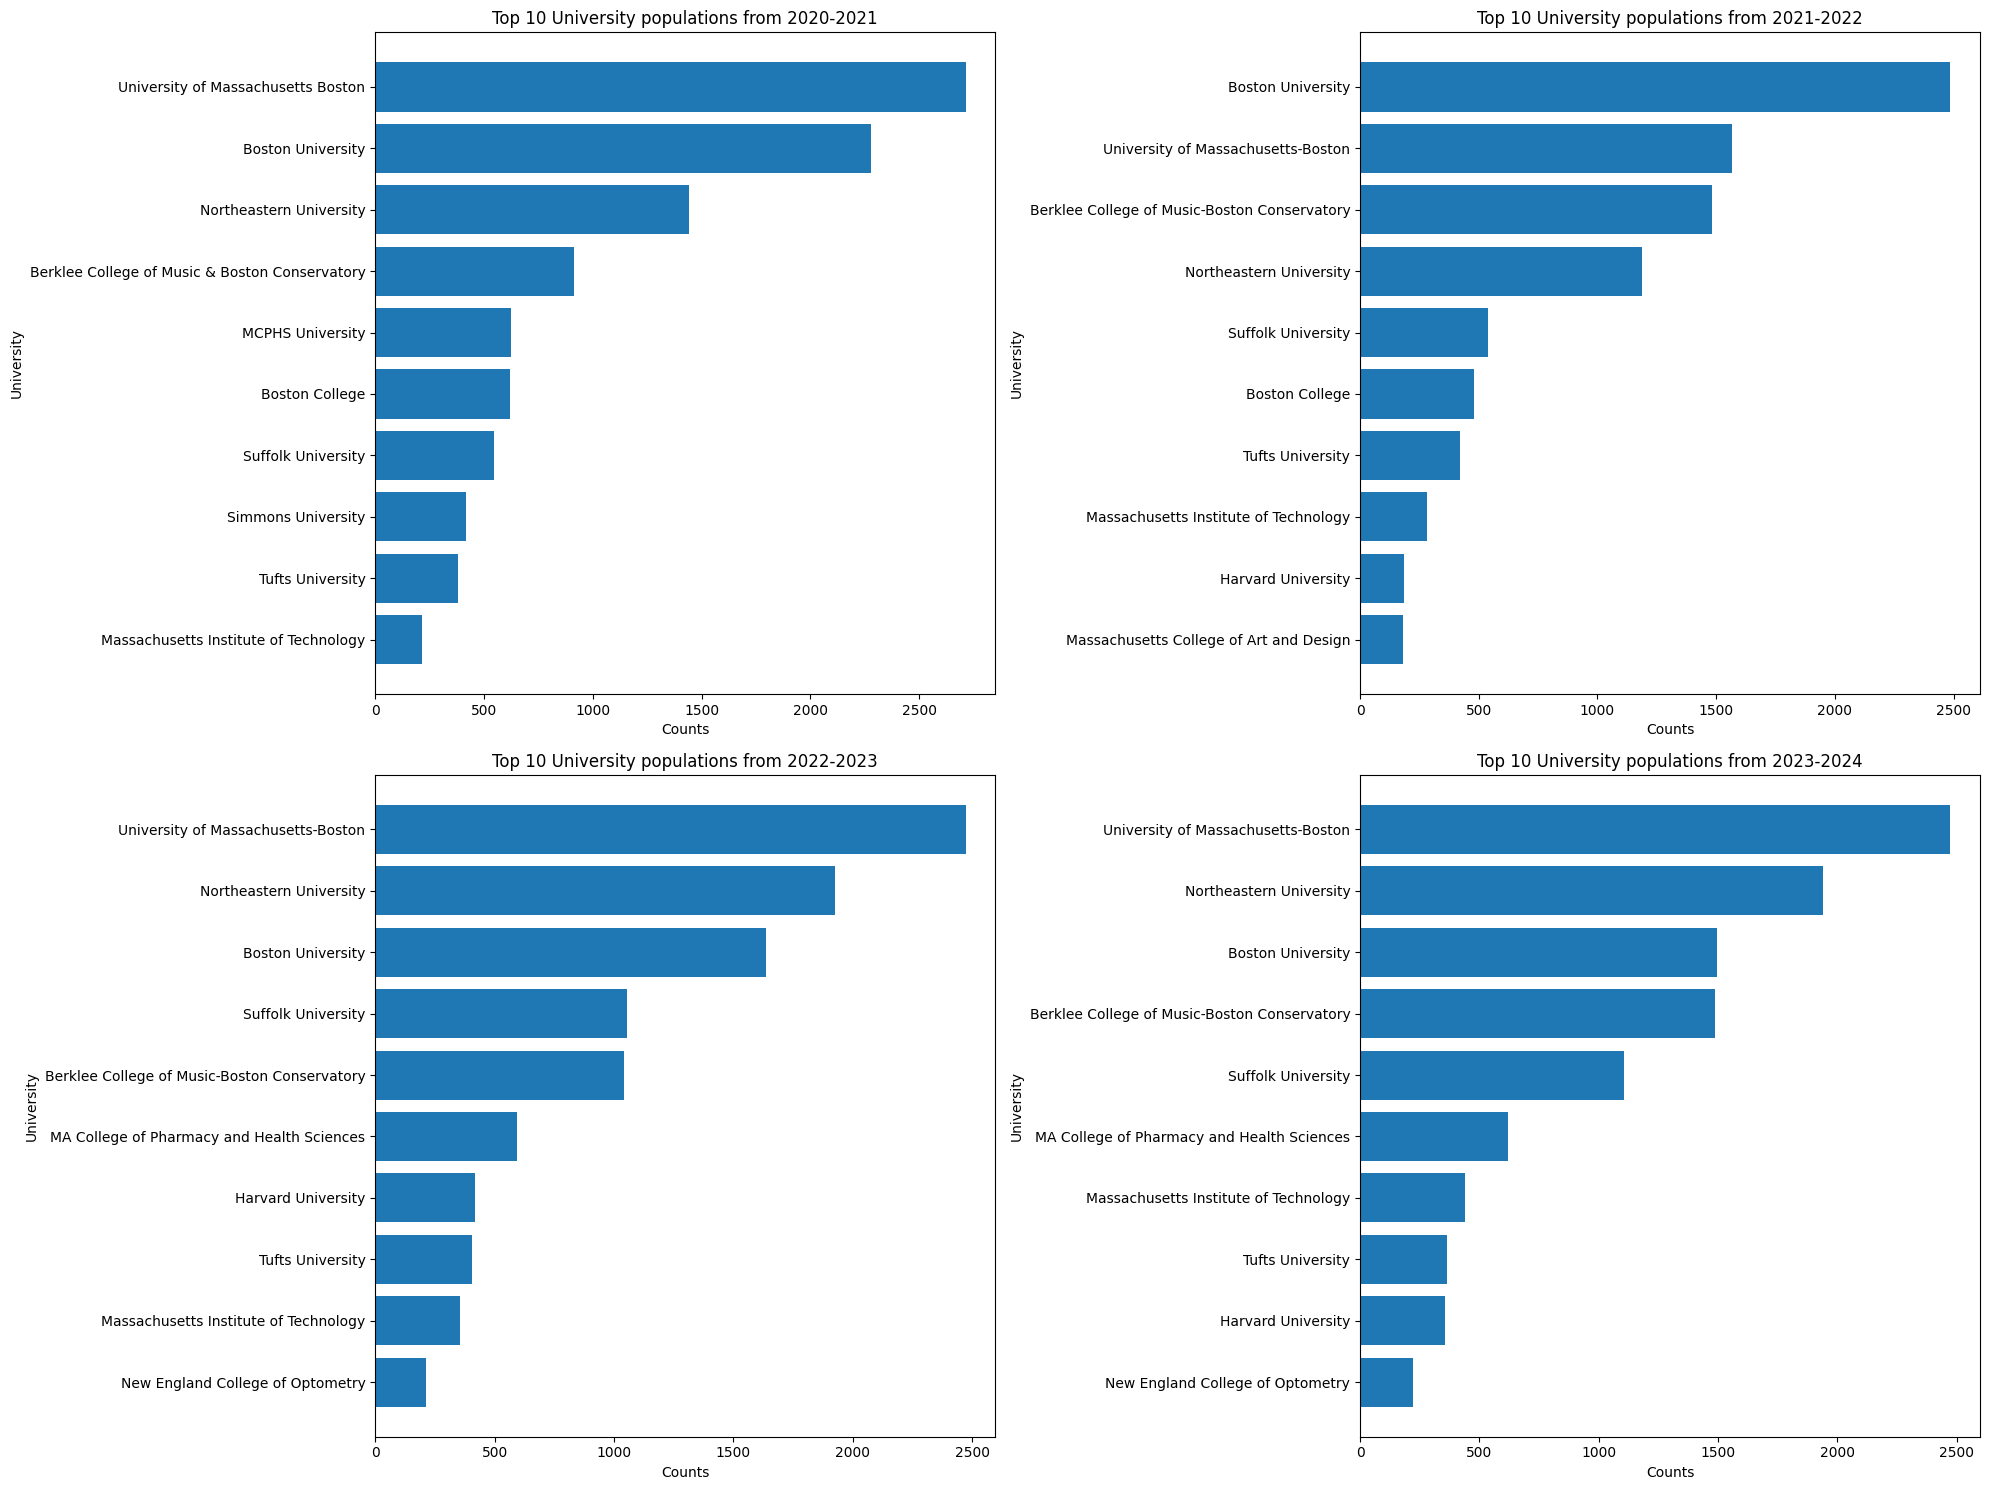

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

fig, axes = plt.subplots(2, 2, figsize=(20, 15)) # Create a 2x2 grid of subplots
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

year_dataframes = [
    (university_2020, '2020-2021'),
    (university_2021, '2021-2022'),
    (university_2022, '2022-2023'),
    (university_2023, '2023-2024')
]

for i, (df, year_label) in enumerate(year_dataframes):
    ax = axes[i]

    # Get the top 10 universities and their counts for the current year
    univ_d = df["University"][:10]
    univ_c = df["Counts"][:10]

    # print(year_label, univ_d)
    # print(year_label, univ_c)

    # Create horizontal bars
    ax.barh(univ_d, univ_c)

    # Add labels and title
    ax.set_xlabel('Counts')
    ax.set_ylabel('University')
    ax.set_title(f'Top 10 University populations from {year_label}')
    ax.invert_yaxis() # Invert y-axis to have the highest count at the top

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

title = "/content/drive/MyDrive/CS506_Project/Assets/MostStudentsyears.png"
plt.savefig(title, dpi=300)

plt.show()

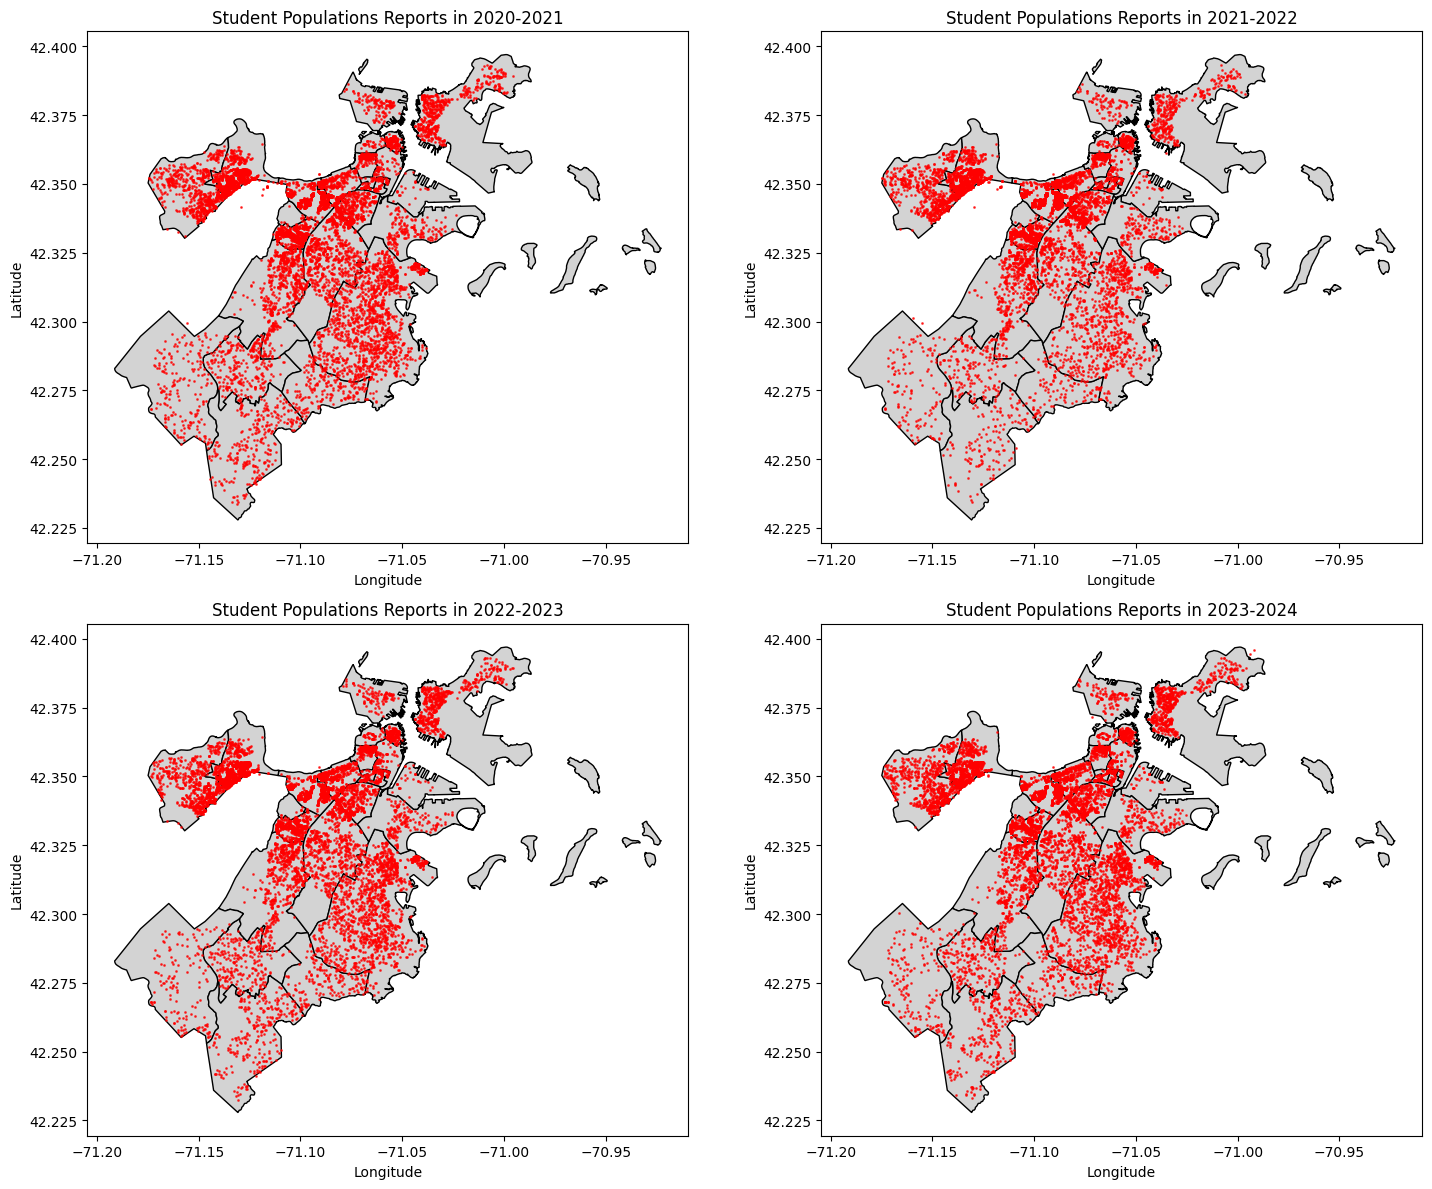

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Static Overlay

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # Create a 2x2 grid of subplots
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

NeighborhoodswData = gpd.read_file('/content/drive/MyDrive/CS506_Project/API/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

dataframes = [
    (df20_21, '2020-2021'),
    (df21_22, '2021-2022'),
    (df22_23, '2022-2023'),
    (df23_24, '2023-2024')
]

for i, (df, year) in enumerate(dataframes):
    ax = axes[i]

    # Overlay the scatterplot
    NeighborhoodswData.plot(ax=ax, color='lightgray', edgecolor='black')
    ax.scatter(df['longitude_geocoded'], df['latitude_geocoded'], s=1, color='red', alpha=0.7, zorder=5)

    ax.set_title(f'Student Populations Reports in {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
import os
import pandas as pd

# Get the file and set to a variable named filename
ftotal = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/Building_property_data", "Building_Property_Violations_year2020_2024.csv")
f1 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/Building_property_data", "Building_Property_Violations_year2020.csv")
f2 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/Building_property_data", "Building_Property_Violations_year2021.csv")
f3 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/Building_property_data", "Building_Property_Violations_year2022.csv")
f4 = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS506_Project/Building_property_data", "Building_Property_Violations_year2023.csv")

# Read the CSV file into a pandas DataFrame
violations_20_24 = pd.read_csv(ftotal, header = 0)
violations_20_21 = pd.read_csv(f1, header = 0)
violations_21_22 = pd.read_csv(f2, header = 0)
violations_22_23 = pd.read_csv(f3, header = 0)
violations_23_24 = pd.read_csv(f4, header = 0)

In [ ]:
violations_23_24.head(10)

,_id,case_no,status_dttm,status,code,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,violation_zip,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude
0,611,V807184,2024-12-30 10:19:11,Closed,102.8,Maintenance,51,NaN,Beech Glen,ST,...,02119,11,51 BEECH GLEN,NaN,ROXBURY,MA,02119,13344.0,42.324460,-71.095251
1,612,V806319,2024-12-26 08:23:23,Closed,105.1,Failure to Obtain Permit,1162,NaN,Morton,ST,...,02126,17,1162 Morton ST,NaN,MATTAPAN,MA,02126,97659.0,42.275810,-71.073231
2,613,V805052,2024-12-20 13:47:15,Closed,102.8,Maintenance,1,5,Harvard,AV,...,02134,21,C/O O'BRIENS PUB/GAIL ATKINSON,3 HARVARD AVE,BOSTON,MA,02134,156445.0,42.355261,-71.132901
3,614,V805020,2024-12-20 09:40:32,Closed,105.4,Validity of Permit,133,NaN,River,ST,...,02126,17,45 SIERRA RD,NaN,HYDE PARK,MA,02136,116362.0,42.271670,-71.076661
4,615,V805017,2024-12-20 09:26:35,Open,105.1,Failure to Obtain Permit,31,NaN,Hazleton,ST,...,02126,14,31 HAZLETON ST UNIT #2,NaN,MATTAPAN,MA,02126,72259.0,42.279550,-71.094591
5,616,V805010,2024-12-20 09:06:39,Open,102.8,Maintenance,31,NaN,Hazleton,ST,...,02126,14,31 HAZLETON ST UNIT #2,NaN,MATTAPAN,MA,02126,72259.0,42.279550,-71.094591
6,617,V805006,2024-12-20 08:53:56,Closed,3307,Protection of Adj. Property,9,NaN,Queen,ST,...,02122,16,9 QUEEN ST,NaN,DORCHESTER,MA,02122,113713.0,42.293680,-71.053369
7,618,V804383,2024-12-18 09:04:18,Open,116,Unsafe Structures,24,NaN,Factory,ST,...,02136,18,15 BARBER ST,NaN,MEDWAY,MA,02053,165148.0,42.253089,-71.126206
8,619,V804382,2024-12-18 08:54:10,Open,102.8,Maintenance,8,10,Winter,ST,...,02136,18,39 BRIGHTON AVE,NaN,BOSTON,MA,02134,171888.0,42.248467,-71.127904
9,620,V799466,2024-12-18 08:40:58,Closed,102.8,Maintenance,383,385,Blue Hill,AV,...,02121,12,"100 HANO ST, Unit SUITE-26",NaN,ALLSTON,MA,02134,16442.0,42.311690,-71.081133


In [ ]:
def violation_counts_year(year_df):
    descs = year_df["description"].unique()
    descs_counts = []

    for d in descs:
        count = len(year_df[year_df["description"] == d])
        descs_counts.append(count)

    data_dict = {
        "Violation Descs": descs,
        "Counts": descs_counts
    }

    viol_year = pd.DataFrame(data_dict)
    sorted_df_desc = viol_year.sort_values(by='Counts', ascending=False)

    return sorted_df_desc

violationcounts_20_21 = violation_counts_year(violations_20_21)
violationcounts_21_22 = violation_counts_year(violations_21_22)
violationcounts_22_23 = violation_counts_year(violations_22_23)
violationcounts_23_24 = violation_counts_year(violations_23_24)

violationcounts_20_21.head(10)

,Violation Descs,Counts
0,Failure to Obtain Permit,298
2,Unsafe and Dangerous,175
4,Maintenance,104
1,Unsafe Structures,78
13,Testing & Certification,48
8,Failed to comply w permit term,39
10,Protection of Adj. Property,17
20,Certificate of Occupancy,15
14,Inspections,14
17,Building or Use of Premise req,12


In [ ]:
# Sample data for All Years
years_d = violations_20_21["Violation Descs"][:10]
years_c = violations_20_21["Counts"][:10]

# Create horizontal bars
plt.barh(years_d, years_c)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Violation Descriptions')
plt.title('Top 10 Housing Violations from 2020-2021')
plt.gca().invert_yaxis()

# Display the plot
title = "/content/drive/MyDrive/CS506_Project/Assets/20_21/housingviolations_20_21"+".png"
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent overlapping titles/labels

plt.savefig(title, dpi=300)

plt.show()

KeyError: 'Violation Descs'

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Higher Contrast Colors for Scatter Plots
VIOLATION_COLORS = [
    "#E6194B", # Red
    "#3CB44B", # Green
    "#FFA600", # Yellow
    "#4363D8", # Blue
    "#F58231", # Orange
    "#911EB4", # Purple
    "#46F0F0", # Cyan
    "#F032E6", # Magenta
    "#BCF60C", # Lime Green
    "#FABEBE"  # Pink
]


# School Year Top Violations compared to School
Broken down via School and the top 6 Violation Types of the School Year

In [ ]:
moststudents20_21 = ["University of Massachusetts Boston", "Boston University", "Northeastern University",
                     "Berklee College of Music & Boston Conservatory", "MCPHS University", "Boston College",
                     "Suffolk University", "Simmons University", "Tufts University",
                     "Massachusetts Institute of Technology"]

moststudents21_22 = ["Boston University", "University of Massachusetts-Boston",
                     "Berklee College of Music-Boston Conservatory", "Northeastern University",
                     "Suffolk University", "Boston College", "Tufts University",
                     "Massachusetts Institute of Technology", "Harvard University",
                     "Massachusetts College of Art and Design"]

moststudents22_23 = ["University of Massachusetts-Boston", "Northeastern University",
                     "Boston University", "Suffolk University", "Berklee College of Music-Boston Conservatory",
                     "MA College of Pharmacy and Health Sciences", "Harvard University",
                     "Massachusetts Institute of Technology", "New England College of Optometry"]

moststudents23_24 = ["University of Massachusetts-Boston", "Northeastern University", "Boston University",
                     "Berklee College of Music-Boston Conservatory", "Suffolk University",
                     "MA College of Pharmacy and Health Sciences", "Massachusetts Institute of Technology",
                     "Tufts University", "Harvard University", "New England College of Optometry"]

In [ ]:
from google.colab import files

# Top 6 violation types and their colors
violation_types = [
    ("Failure to Obtain Permit", VIOLATION_COLORS[0]),
    ("Unsafe Structures", VIOLATION_COLORS[1]),
    ("Testing & Certification", VIOLATION_COLORS[2]),
    ("Maintenance", VIOLATION_COLORS[3]),
    ("Failed to comply w permit term", VIOLATION_COLORS[4]),
    ("Unsafe and Dangerous", VIOLATION_COLORS[5]),
]

for i in range(0, len(moststudents23_24)):

  NeighborhoodswData = gpd.read_file('/content/drive/MyDrive/CS506_Project/API/ShapeFiles/Boston_Neighborhood_Boundaries.shp')
  fig, axes = plt.subplots(3, 2, figsize=(20, 25)) # Create a 5x2 grid of subplots
  axes = axes.flatten() # Flatten the 5x2 array of axes for easier iteration

  suptitle = "Top 6 Housing Violation Types with "+moststudents23_24[i]+" Student Population (2022-2023)"
  fig.suptitle(suptitle, fontsize=18, y=0.98)

  school_23_24 = df23_24[df23_24['university'] == moststudents23_24[i]]

  for idx, (desc, color) in enumerate(violation_types):
      ax = axes[idx]

      # Plot neighborhood boundaries
      NeighborhoodswData.plot(ax=ax, color=GRAY, edgecolor='black')

      # Plot violation data
      x_violation = violations_23_24[violations_23_24["description"] == desc]['longitude']
      y_violation = violations_23_24[violations_23_24["description"] == desc]['latitude']
      ax.scatter(x_violation, y_violation, color=color, marker='x', label=f'Violations: {desc}', s=8, alpha=1, zorder=5)

      # Overlay School student data
      label = moststudents23_24[i] + " Students"
      ax.scatter(school_23_24['longitude_geocoded'], school_23_24['latitude_geocoded'], s=1, color='#636363', alpha=0.45, zorder=6, label=label)

      # Set title and labels
      ax.set_title(f'{desc}', fontsize=12)
      ax.set_xlabel('Longitude', fontsize=10)
      ax.set_ylabel('Latitude', fontsize=10)
      ax.legend(loc='upper right', fontsize=8)
      ax.grid(True, linestyle='--', alpha=0.6)

  plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent overlapping titles/labels

  title = "/content/drive/MyDrive/CS506_Project/Assets/23_24/"+moststudents23_24[i]+"23_24"+".png"
  plt.savefig(title, dpi=300)

NameError: name 'VIOLATION_COLORS' is not defined

In [ ]:
import os
import matplotlib.pyplot as plt
from google.colab import files

# Top 6 violation types and their colors
violation_types = [
    ("Failure to Obtain Permit", VIOLATION_COLORS[0]),
    ("Unsafe Structures", VIOLATION_COLORS[1]),
    ("Testing & Certification", VIOLATION_COLORS[2]),
    ("Maintenance", VIOLATION_COLORS[3]),
    ("Failed to comply w permit term", VIOLATION_COLORS[4]),
    ("Unsafe and Dangerous", VIOLATION_COLORS[5]),
]

for i in range(0, len(moststudents20_21)):
    # Sanitize university name for folder creation
    univ_name_for_path = moststudents20_21[i].replace(" ", "_").replace("&", "and").replace("/", "-").replace(",", "")
    folder_path = "/content/drive/MyDrive/CS506_Project/Assets/20_21/" + univ_name_for_path + "/"

    # Create the university-specific folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    school_20_21 = df20_21[df20_21['university'] == moststudents20_21[i]]

    for idx, (desc, color) in enumerate(violation_types):
        fig, ax = plt.subplots(1, 1, figsize=(10, 8)) # Create a new figure for each plot

        # Plot neighborhood boundaries
        NeighborhoodswData.plot(ax=ax, color=GRAY, edgecolor='black')

        # Plot violation data
        x_violation = violations_20_21[violations_20_21["description"] == desc]['longitude']
        y_violation = violations_20_21[violations_20_21["description"] == desc]['latitude']
        ax.scatter(x_violation, y_violation, color=color, marker='x', label=f'Violations: {desc}', s=8, alpha=1, zorder=5)

        # Overlay School student data
        label = moststudents20_21[i] + " Students"
        ax.scatter(school_20_21['longitude_geocoded'], school_20_21['latitude_geocoded'], s=1, color='#636363', alpha=0.45, zorder=6, label=label)

        # Set title and labels
        ax.set_title(f'Housing Violations: {desc}\n{moststudents20_21[i]} Student Population (2022-2023)', fontsize=12)
        ax.set_xlabel('Longitude', fontsize=10)
        ax.set_ylabel('Latitude', fontsize=10)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

        # Sanitize violation description for filename
        file_name = desc.replace(" ", "_").replace("&", "and").replace("/", "-").replace(",", "") + "_20_21.png"
        save_path = os.path.join(folder_path, file_name)
        plt.savefig(save_path, dpi=300)
        plt.close(fig) # Close the figure to free up memory

    # plt.show() # Remove plt.show() as we are saving individual plots

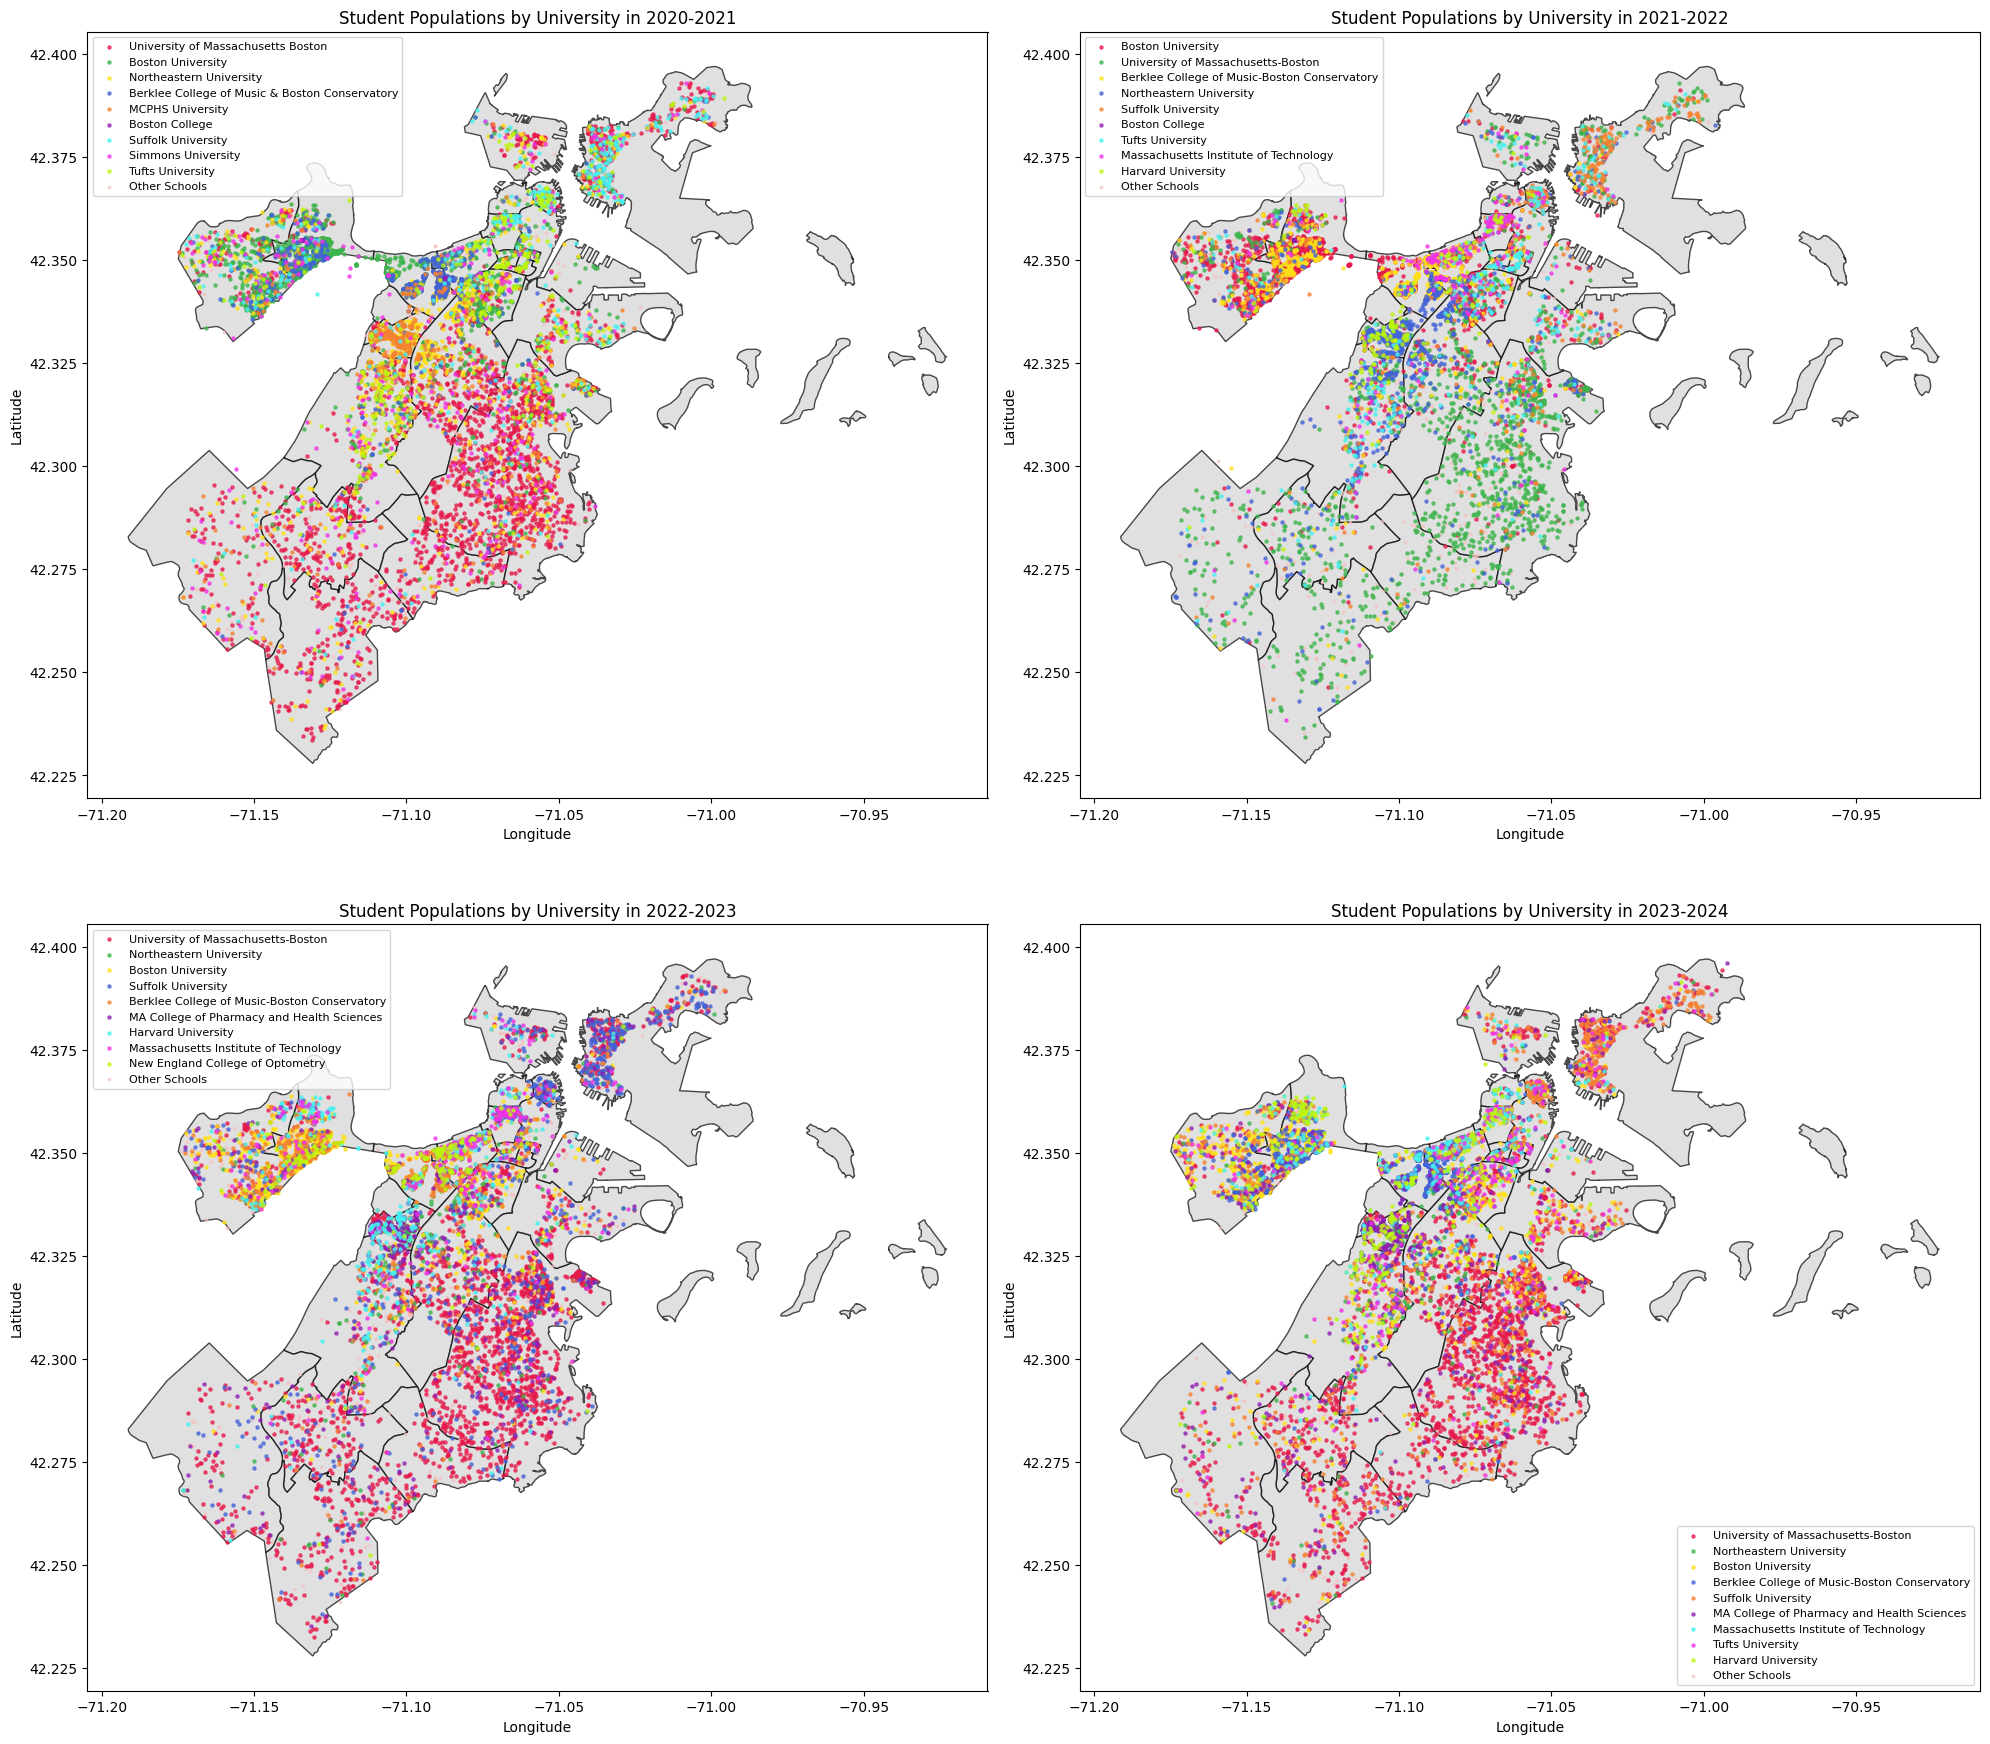

Plots saved to /content/drive/MyDrive/CS506_Project/Assets/student_populations_by_university_all_years.png


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Define a list of 10 distinct colors for STUDENT_COLORS
STUDENT_COLORS = [
    '#E6194B',  # Red
    '#3CB44B',  # Green
    '#FFE119',  # Yellow
    '#4363D8',  # Blue
    '#F58231',  # Orange
    '#911EB4',  # Purple
    '#46F0F0',  # Cyan
    '#F032E6',  # Magenta
    '#BCF60C',  # Lime Green
    '#FABEBE'   # Pink
]

fig, axes = plt.subplots(2, 2, figsize=(20, 18)) # Create a 2x2 grid of subplots
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

NeighborhoodswData = gpd.read_file('/content/drive/MyDrive/CS506_Project/API/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

dataframes = [
    (df20_21, '2020-2021'),
    (df21_22, '2021-2022'),
    (df22_23, '2022-2023'),
    (df23_24, '2023-2024')
]

for i, (df, year_label) in enumerate(dataframes):
    ax = axes[i]

    # Overlay the scatterplot
    NeighborhoodswData.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7)

    # Determine the correct moststudents list for the current year
    current_moststudents = []
    if year_label == '2020-2021':
        current_moststudents = moststudents20_21
    elif year_label == '2021-2022':
        current_moststudents = moststudents21_22
    elif year_label == '2022-2023':
        current_moststudents = moststudents22_23
    elif year_label == '2023-2024':
        current_moststudents = moststudents23_24

    # Plot top 9 universities
    universities_plotted = []
    for univ_idx in range(min(9, len(current_moststudents))): # Ensure we don't go out of bounds if less than 9 schools
        university_name = current_moststudents[univ_idx]
        univ_df = df[df['university'] == university_name]
        ax.scatter(
            univ_df['longitude_geocoded'],
            univ_df['latitude_geocoded'],
            s=5, # Slightly larger for individual schools
            color=STUDENT_COLORS[univ_idx],
            alpha=0.7,
            zorder=5,
            label=university_name
        )
        universities_plotted.append(university_name)

    # Plot 'Other Schools'
    other_schools_df = df[~df['university'].isin(universities_plotted)]
    if not other_schools_df.empty:
        ax.scatter(
            other_schools_df['longitude_geocoded'],
            other_schools_df['latitude_geocoded'],
            s=3, # Smaller size for 'Other Schools'
            color=STUDENT_COLORS[9], # Use the 10th color
            alpha=0.6,
            zorder=4, # Lower zorder so top schools are on top
            label='Other Schools'
        )

    ax.set_title(f'Student Populations by University in {year_label}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend(loc='best', fontsize=8)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

# Save the combined plot
save_path = os.path.join('/content/drive/MyDrive/CS506_Project/Assets/', 'student_populations_by_university_all_years.png')
plt.savefig(save_path, dpi=300)

plt.show()
print(f"Plots saved to {save_path}")

# Visualize the Kmeans and Student Population Overlay

In [ ]:
from sklearn.cluster import KMeans
import collections

# 1. Select the 'latitude' and 'longitude' columns
X_violations = violations_23_24[['latitude', 'longitude']]

# 2. Remove any rows that contain missing values
X_violations = X_violations.dropna()

# 4. Initialize a KMeans object
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')

# 5. Fit the kmeans model to the prepared X_violations data
kmeans.fit(X_violations)

# 6. Retrieve the cluster labels for each data point and store them in a new column
X_violations['cluster_label'] = kmeans.labels_

# 7. Get the coordinates of the cluster centroids
centroids_violations = kmeans.cluster_centers_

print(f"Shape of X_violations after dropping NaNs: {X_violations.shape}")
print(f"Number of clusters: {n_clusters}")
print(f"First 5 rows of X_violations with cluster labels:\n{X_violations.head()}")
print(f"Cluster centroids:\n{centroids_violations}")

Shape of X_violations after dropping NaNs: (1065, 3)
Number of clusters: 9
First 5 rows of X_violations with cluster labels:
    latitude  longitude  cluster_label
0  42.324460 -71.095251              8
1  42.275810 -71.073231              1
2  42.355261 -71.132901              5
3  42.271670 -71.076661              1
4  42.279550 -71.094591              1
Cluster centroids:
[[ 42.34648109 -71.07948563]
 [ 42.28147357 -71.08501763]
 [ 42.35092067 -71.0528201 ]
 [ 42.28523654 -71.14178069]
 [ 42.30759616 -71.06671968]
 [ 42.35100623 -71.14302357]
 [ 42.25877265 -71.11749521]
 [ 42.37833716 -71.02704689]
 [ 42.32493801 -71.09642984]]


In [ ]:
X_students = df23_24[['latitude_geocoded', 'longitude_geocoded']]
X_students = X_students.dropna()

print(f"Shape of X_students after dropping NaNs: {X_students.shape}")
print(f"First 5 rows of X_students:\n{X_students.head()}")

Shape of X_students after dropping NaNs: (9869, 2)
First 5 rows of X_students:
   latitude_geocoded  longitude_geocoded
0          42.286801          -71.146415
1          42.336859          -71.150551
2          42.340979          -71.153661
3          42.346851          -71.145434
4          42.306183          -71.067348


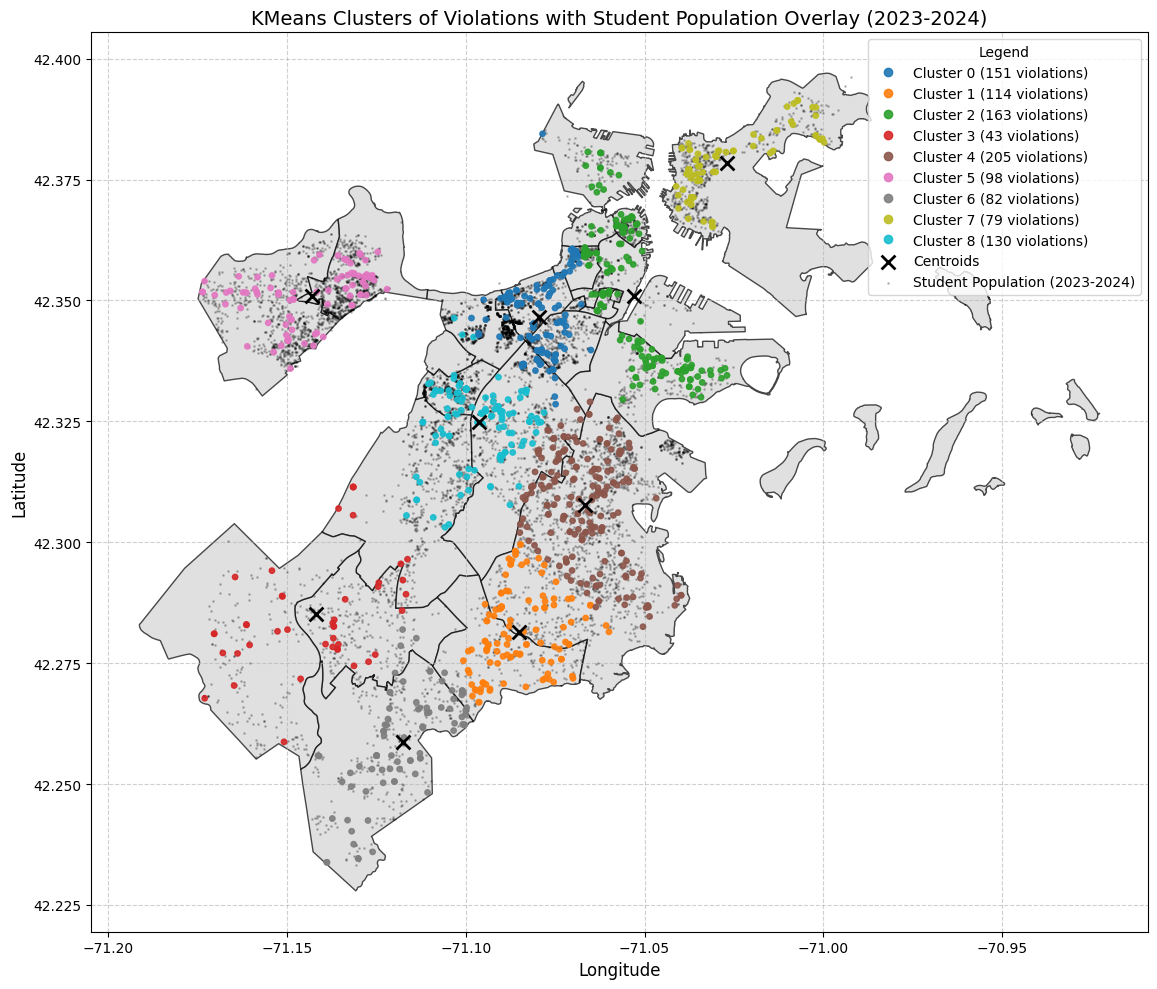

Plot saved to: /content/drive/MyDrive/CS506_Project/Assets/kmeans_violations_students_2023_2024.png


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import collections # Import collections for Counter
import os

# 1. Create a figure and a single axes object for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 2. Load the Boston Neighborhood Boundaries shapefile
NeighborhoodswData = gpd.read_file('/content/drive/MyDrive/CS506_Project/API/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# 3. Plot the NeighborhoodswData as the base layer
NeighborhoodswData.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7)

# 4. Create a scatter plot for the violation clusters
# Use a categorical colormap like 'tab10' for distinct clusters
scatter_violations = ax.scatter(
    X_violations["longitude"],
    X_violations["latitude"],
    c=X_violations["cluster_label"],
    cmap='tab10',
    marker='o',
    s=15,
    alpha=0.9,
    zorder=5 # Ensure violations are above neighborhoods
)

# 5. Plot the cluster centroids
ax.scatter(
    centroids_violations[:, 1], # Longitude
    centroids_violations[:, 0], # Latitude
    color='black',
    marker='x',
    s=100,
    linewidths=2,
    label='Centroids',
    zorder=6 # Ensure centroids are above violations
)

# 6. Create a scatter plot for the student population data
ax.scatter(
    X_students['longitude_geocoded'],
    X_students['latitude_geocoded'],
    s=1,
    color='black', # Distinct color for students
    alpha=0.2,
    label='Student Population (2023-2024)',
    zorder=4 # Students below violations but above neighborhoods
)

# 7. Set title and labels
ax.set_title('KMeans Clusters of Violations with Student Population Overlay (2023-2024)', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 8. Add a grid
ax.grid(True, linestyle='--', alpha=0.6)

# 9. Create a custom legend
# Get handles and labels for cluster colors
cluster_counts = collections.Counter(X_violations['cluster_label'])
cluster_handles, cluster_labels = scatter_violations.legend_elements()
legend_labels = [f'Cluster {i} ({cluster_counts[i]} violations)' for i in sorted(cluster_counts.keys())]

# Combine with centroids and student population handles/labels
handles = cluster_handles + [ax.collections[-2], ax.collections[-1]] # Centroids is second to last, Students is last
labels = legend_labels + ['Centroids', 'Student Population (2023-2024)']

ax.legend(handles=handles, labels=labels, title='Legend', loc='best', fontsize=10)

# 10. Adjust layout
plt.tight_layout()

# 11. Save the plot to a file
save_path = os.path.join('/content/drive/MyDrive/CS506_Project/Assets/', 'kmeans_violations_students_2023_2024.png')
plt.savefig(save_path, dpi=300)

# 12. Display the plot
plt.show()

print(f"Plot saved to: {save_path}")